## Validation of Cooling Lib
This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


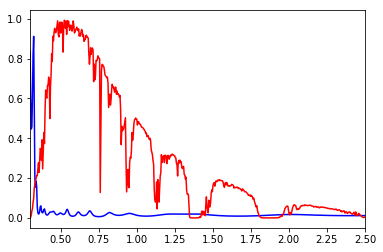

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T_ml
        'Temperature': 300,
        ### ambient temperature - relevant for cooling lib because it determines the
        ### the thermal emission of the atmosphere
        ### actual materials the structure is made from
        'Ambient_Temperature': 300,
        ### This is the structure described in Figure 1 of Raman et al.
        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        ### We need to span solar spectrum and atmospheric transmissivity window
        ### solar spectrum spans ~300 - 2500 nm, and atmospheric transmissivity + BB spectrum
        ### of terrestrial bodies at ambient T span ~2500 nm - 20,000 nm
        'Lambda_List': [300e-9, 20000e-9, 5000],
        ### We need to compute the emissivity of the structure as a function of angle
        ### to get the total radiated power / absorbed power
        'EXPLICIT_ANGLE': 1,
        ### The folloing entry will tell the computer to use the coolinglib functions
        'COOLING': 1
     
        }

w_slab = multilayer(structure)
AM = datalib.AM(w_slab.lambda_array)

plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'blue')
plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red')
plt.xlim(0.3,2.5)
plt.show()

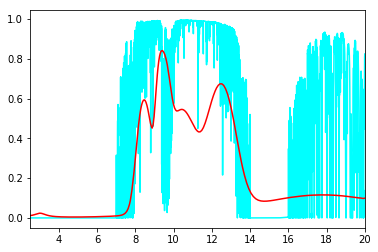

In [7]:
T_atm = datalib.ATData(w_slab.lambda_array)
plt.plot(w_slab.lambda_array*1e6, T_atm, 'cyan', label='Atmospheric Transparency')
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'red', label='Emissivity')
plt.xlim(2.5,20)
plt.show()

In [8]:
w_slab.cooling_power()

print("Radiative Power (cooling) is ",w_slab.radiative_power_val, "W/m^2")
print("Absorbed Solar Power (warming) is ",w_slab.solar_power_val, "W/m^2")
print("Absorbed Atmospheric Radiation is ",w_slab.atmospheric_power_val, "W/m^2")
print("Net Power flux out of the structure is ",w_slab.cooling_power_val, "W/m^2")

Radiative Power (cooling) is  112.07135959451281 W/m^2
Absorbed Solar Power (warming) is  18.5357395197782 W/m^2
Absorbed Atmospheric Radiation is  29.724099749188134 W/m^2
Net Power flux out of the structure is  63.81152032554648 W/m^2
